## Hypothesis Testing

When applying data science techniques to different domains, we are often faced with questions about the world. For example, does drinking coffee cause sleep deprivation? Do autonomous vehicles crash more often then non-autonomous vehicles? Does drug X help treat pnemonia? Although we may not have the expertise or domain knowledge to fully answer these questions, we can conduct hypothesis tests in order to make informed conclusions based on observed evidence/data. 

Our observed data may contain noise; we are often unsure whether the patterns in our dataset are due to noise or other factors. Hypothesis testing helps us determine whether a pattern could have happened because of random fluctuations in our data collection.

To explore hypothesis testing, let's start with an example. The `table` baby contains the following variables for 1,174 mother-baby pairs: the baby's birth weight in ounces, the number of gestational days, the mother's age in completed years, the mother's height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [2]:
#HIDDEN 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
%matplotlib inline

from google.colab import files
uploaded = files.upload()

import io
baby = pd.read_csv(io.StringIO(uploaded['baby.csv'].decode('utf-8')))
baby = baby.loc[:, ["Birth Weight", "Maternal Smoker"]]
baby.head()

Saving baby.csv to baby.csv


,Birth Weight,Maternal Smoker
0,120,False
1,113,False
2,128,True
3,108,True
4,136,False


**Hypothesis Test Design**

We would like to see whether maternal smoking was associated with birth weight.  To set up our hypothesis test, we can represent the two views of the word in the following hypotheses:

**Null hypothesis:** In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

Our ultimate goal is to make a decision between these two data generation models. One key to notice is that we contruct our hypotheses about the *parameters* of the data generation model rather than the outcome of the experiment. For example, we should not contruct a null hypothesis such as "The birth weights of smoking mothers will be equal to the birth weights of nonsmoking mothers", since there is natural variability in the outcome of this process.

The null hypothesis emphasizes that if the data look different from what the null hypothesis predicts, the difference is due to nothing but chance. Informally, the alternative hypothesis says that the observed difference is "real." We should take a closer look at the structure of our alternative hypothesis. In our current set up, notice that we would reject the null hypothesis if the birth weights of babies of the mothers who smoke are significantly lower than the birth weights of the babies of the mothers who do not smoke. In other words, the alternative hypothesis encompasses/supports one side of the distribution. We call this a **one-sided** alternative hypothesis. In general, we would only want to use this type of alternative hypothesis if we have a good reason to believe that it is impossible to see babies of the mothers who smoke have a higher birth weight, on average. Upon seeing the distribution of birth weights of the babies of the non-smoking mothers compared to those of the smoking mothers (shown below), we have chosen to make our alternative hypothesis one-sided.




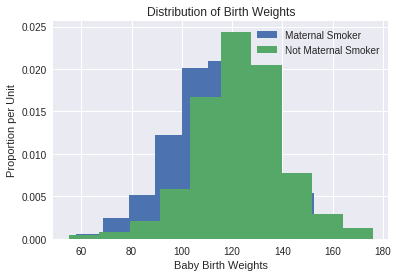

In [5]:
smokers_hist = baby[baby["Maternal Smoker"] == True].loc[:, "Birth Weight"].hist(normed=True, label = "Maternal Smoker")
non_smokers_hist = baby[baby["Maternal Smoker"] == False].loc[:, "Birth Weight"].hist(normed=True, label = "Not Maternal Smoker")
smokers_hist.set_xlabel("Baby Birth Weights")
smokers_hist.set_ylabel("Proportion per Unit")
smokers_hist.set_title("Distribution of Birth Weights")
plt.legend()
plt.show()

The weights of the babies of the mothers who smoked seem lower, on average than the weights of the babies of the non-smokers. Could this difference reflect just chance variation or a difference in the distributions in the larger population? We can try to answer this question using a hypothesis test.

The basis of hypothesis testing is that we assume a particular model for generating the data; then, we ask ourselves, what is the chance we would see an outcome as extreme as the one that we observed? Intuitively, if the chance of seeing the outcome we observed is very small, then the model that we assumed may not be the appropriate model. 

In particular, we assume that the **null model** is true, which is the probability model if the null hypothesis is true. In other words, we assume that the null hypothesis is true and focus on what the value of the statistic would be under under the null hypothesis. This chance model says that there is no underlying difference; the distributions in the samples are different just due to chance.

**Test Statistic**

In our example, we would assume that maternal smoking has no effect on baby weight (where any observed difference is due to chance). In order to choose between our hypotheses, we will use the difference between the two group means as our **test statistic**.
Formally, our test statistic is

$$\mu_{smoking} - \mu_{non-smoking}$$

so that small values (that is, large negative values) of this statistic will favor the alternative hypothesis. Let's calculate the observed value of test statistic:


In [7]:
nonsmoking_birthweights = baby[baby["Maternal Smoker"] == False].loc[:, "Birth Weight"]
smoking_birthweights = baby[baby["Maternal Smoker"] == True].loc[:, "Birth Weight"]
observed_difference = np.mean(smoking_birthweights) - np.mean(nonsmoking_birthweights)
observed_difference

-9.266142572024918

If there were really no difference between the two distributions in the underlying population, then whether each mother was a maternal smoker or not should not affect the average birth weight. In other words, the label True or False with respect to maternal smoking should make no difference to the average.

Therefore, in order to simulate the test statistic under the null hypothesis, we can shuffle all the birth weights randomly among the mothers. This is called random permutation. Let's use this technique below on our data.

In [9]:
n = len(baby) #Total number of babies
shuffled_weights = baby["Birth Weight"].sample(n, replace = False)
baby["Shuffled Birth Weight"] = np.array(shuffled_weights)
baby.head()

,Birth Weight,Maternal Smoker,Shuffled Birth Weight
0,120,False,144
1,113,False,154
2,128,True,131
3,108,True,125
4,136,False,108


Tests based on random permutations of the data are called **permutation tests**. In the cell below, we will simulate our test statistic many times and collect the differences in an array. 

In [0]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
  shuffled_weights = baby["Birth Weight"].sample(n, replace = True)
  baby["Shuffled Birth Weight"] = np.array(shuffled_weights)
  
  # Find the difference between the means of two randomly assigned groups
  nonsmoking_birthweights = baby[baby["Maternal Smoker"] == False].loc[:, "Shuffled Birth Weight"]
  smoking_birthweights = baby[baby["Maternal Smoker"] == True].loc[:, "Shuffled Birth Weight"]
  simulated_difference = np.mean(smoking_birthweights) - np.mean(nonsmoking_birthweights)
  
  differences = np.append(differences, simulated_difference)

Text(0.5,1,u'Distribution of Birth Weight Differences')

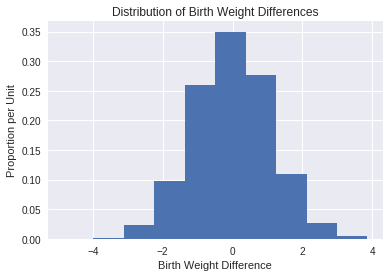

In [13]:
differences_df = pd.DataFrame()
differences_df["differences"] = differences
diff_hist = differences_df.loc[:, "differences"].hist(normed = True)
diff_hist.set_xlabel("Birth Weight Difference")
diff_hist.set_ylabel("Proportion per Unit")
diff_hist.set_title("Distribution of Birth Weight Differences")

It makes sense that the distribution of differences is centered around 0, since the two groups should have roughly the same average under the null hypothesis. 

In order to draw a conclusion for this hypothesis test, we should calculate the p-value. The empirical P-value of the test is the proportion of simulated differences that were equal to or less than the observed difference. 

In [0]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_P

0

At the beginning of the hypothesis test, we typically chose a p-value **threshold of significance** (commonly denoted as alpha). If our p-value is below our significance threshold, then we reject the null hypothesis. The most commonly chosen thresholds are 0.01 and 0.05, where 0.01 is considered to be more "strict" since we would need more evidence in favor of the alternative hypothesis to reject the null hypothesis.

In either case, we reject the null hypothesis since the p-value is less than the significance threshold. 

**Bootstrapping**

As data scientists, a common task is to estimate an unknown population parameter using a random sample. Although we would ideally like to take numerous samples from the population in order to generate a sampling distribution, we often have access to a limited amount of money and resources.

Since it may not always be feasible to generate new samples from the population, we can perform the bootstrap procedure. The bootstrap procedure generates new random samples by resampling from the original sample. 

The bootstrap is a simple process:


*   Sample with replacement from the original sample (now the bootstrap population). These samples are called bootstrap samples. We typically take thousands of bootstrap samples (~10,000 is common).
*   Calculate the statistic of interest for each bootstrap sample. This statistic is called the bootstrap statistic, and the empirical distribution of these bootstrap statistics is an approximation to the sampling distribution of the bootstrapped statistic.







![alt text](https://ds8.gitbooks.io/textbook/content/notebooks-images/Bootstrap_25_0.png)

Going back to our example, we may want to build a confidence interval for the difference in average birthweight of the babies of smoking mothers and babies of non-smoking mothers. 
We act as if the data on mothers who did not smoke is a representation of the population of nonsmoking mothers. Similarly, we act as if the data for smoking mothers is a representation of the population of smoking mothers. Therefore, we treat our original samples as the bootstrap populations. To perform the bootstrap procedure, we do the following:

* Draw a sample, with replacement, from the nonsmoking mothers and calculate the mean. We also draw a sample, with replacement, from smoking mothers and calculate the mean.

*  Caculate the difference in means.

*  We repeat the above process 10000 times, obtaining 10000 mean differences.

This procedure gives us the sampling distribution of differences in means for samples from these populations.

In [0]:
# Indices for a single bootstrap replicate from the bootstrap population.
def simple_resample(n):
    return(np.random.randint(low=0, high=n, size=n))
  

def bootstrap(boot_pop, statistic, resample, replicates=10000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return(resample_estimates)

Text(0.5,1,u'Distribution of Birth Weight Differences')

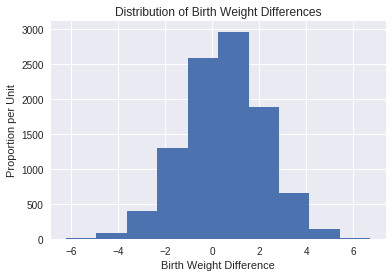

In [16]:
non_smoking_means = bootstrap(nonsmoking_birthweights, np.mean, simple_resample, replicates=10000)
smoking_means = bootstrap(smoking_birthweights, np.mean, simple_resample, replicates=10000)
mean_differences = smoking_means - non_smoking_means

mean_differences_df = pd.DataFrame()
mean_differences_df["differences"] = np.array(mean_differences)
mean_diff = mean_differences_df.loc[:, "differences"].hist()
mean_diff.set_xlabel("Birth Weight Difference")
mean_diff.set_ylabel("Proportion per Unit")
mean_diff.set_title("Distribution of Birth Weight Differences")

The central limit theorem says that the sample mean has a distribution that roughly follows the normal distribution. The central limit theorem holds when the sample size is large in absolute terms, but small relative to the population.